In [33]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

import codecs
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams.update({'font.size': 18})


In [2]:
tags = open('data/training_tags.txt').read().splitlines()
texts = codecs.open('data/training_texts.txt', 'r', 'utf-8').read().splitlines()
df = pd.DataFrame({'tag': tags, 'text': texts})

In [ ]:
tag_counts = dict(Counter(tags))


def format_tag_count(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


tag_to_string = {
    '0': 'non-harmful',
    '1': 'cyberbullying',
    '2': 'hate-speech',
}

plt.figure(figsize=(15, 15))
plt.pie(
    tag_counts.values(),
    labels=[tag_to_string[tag] for tag in tag_counts.keys()],
    autopct=lambda pct: format_tag_count(pct, list(tag_counts.values())),
)
plt.savefig('tags_pie_plot.png')

In [ ]:
lengths = [len(text.split()) for text in list(df.text)]
plt.figure(figsize=(15, 15))
sns.histplot(lengths, binwidth=1)
plt.xlabel('Number of words in a tweet')
plt.ylabel('Number of tweets')
plt.savefig('tweet_word_counts_plot.png')

In [ ]:
lengths = [len(text) for text in list(df.text)]
plt.figure(figsize=(15, 15))
sns.histplot(lengths, binwidth=5)
plt.xlabel('Length of a tweet')
plt.ylabel('Number of tweets')
plt.savefig('tweet_lengths_plot.png')


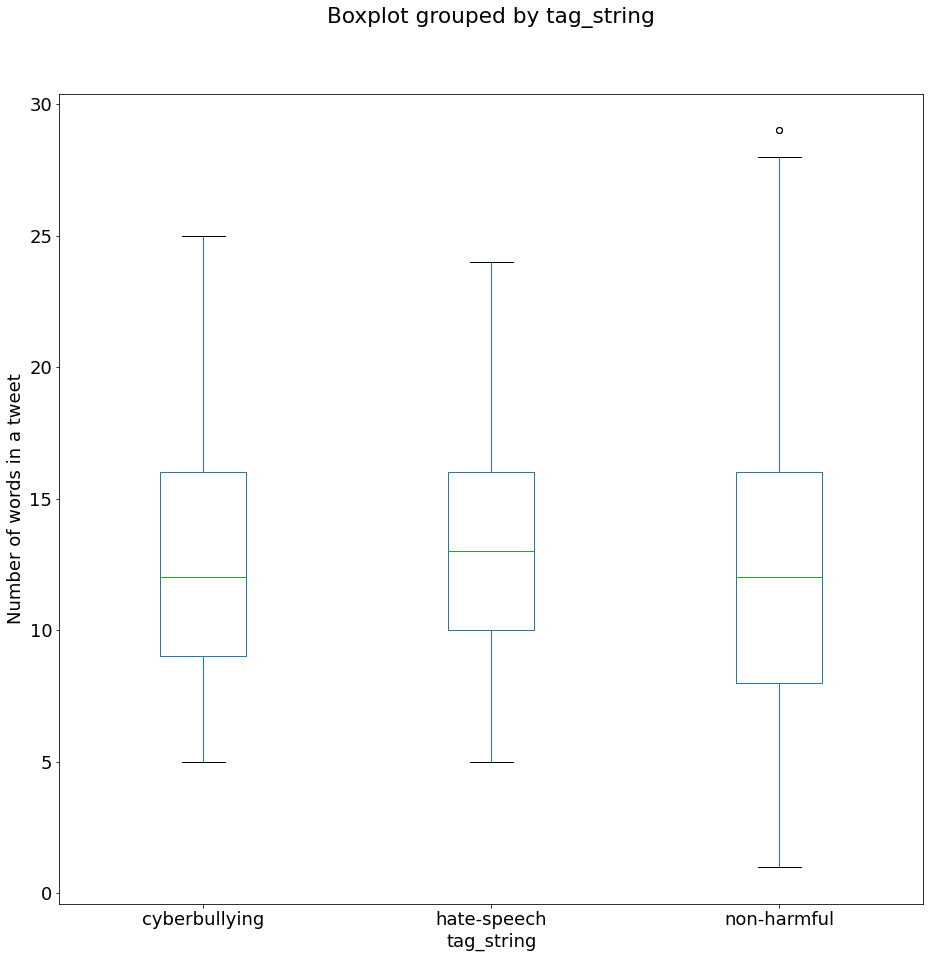

In [77]:
df['tag_string'] = [tag_to_string[tag] for tag in df['tag']]
df.boxplot(column=['word_count'], by='tag_string', figsize=(15, 15), grid=False)
plt.ylabel('Number of words in a tweet')
plt.title('')
plt.savefig('tweet_word_counts_box_plot.png')
